In [2]:
import os
import glob
import cv2
import skimage
from skimage import io
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [4]:

dataset_path='data/Plants_2'
diseases=os.listdir(dataset_path)
classes_paths=[]
for i in range(len(diseases)):
    classes_paths.append(os.path.join(dataset_path,diseases[i]))

files=[]
for path in classes_paths:
    for x in os.listdir(path):
            files.append(path+'/'+x)



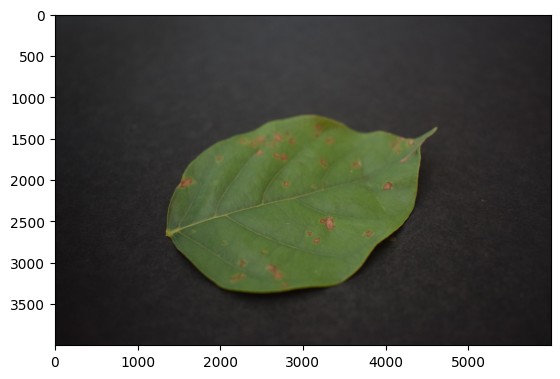

In [3]:

rand=random.randint(0,100)
image = io.imread(files[0])
plt.imshow(image)



In [6]:
import shutil
from tqdm import tqdm


def make_segments(sdir,img_size):
    lower_green = np.array([25,52,72])
    upper_green = np.array([102,255,255])
    lower_brown = np.array([10,100,20])
    upper_brown = np.array([20,255,200])
    working_dir=r'./data'
    dstdir=os.path.join(working_dir, 'for_image')
    if os.path.isdir(dstdir):
        shutil.rmtree(dstdir)
    os.mkdir(dstdir)
    filepaths=[]
    labels=[]
    plant_list=sorted(os.listdir(sdir) )     
    for plant in plant_list:
        plant_path=os.path.join(sdir, plant)
        dst_plant_path=os.path.join(dstdir, plant)
        os.mkdir(dst_plant_path)
        classlist=sorted(os.listdir(plant_path))
        for klass in classlist:
            classpath=os.path.join(plant_path, klass)
            dst_classpath=os.path.join(dst_plant_path, klass)
            os.mkdir(dst_classpath)
            flist=sorted(os.listdir(classpath)) 
            desc=f'{plant:25s}-{klass:9s}'
            for f in tqdm(flist, ncols=130,desc=desc, unit='files', colour='blue'):
                fpath=os.path.join(classpath,f)
                dst_fpath=os.path.join(dst_classpath,f)
                filepaths.append(dst_fpath)
                img=cv2.imread(fpath)
                img=cv2.resize(img, img_size)
                hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
                mask = cv2.inRange(hsv, lower_green, upper_green)
                res = cv2.bitwise_and(img,img, mask= mask)
                mask2 = cv2.inRange(hsv, lower_brown, upper_brown)
                res2 = cv2.bitwise_and(img,img, mask= mask2)
                final_mask=(res+res2)
                cv2.imwrite(dst_fpath, final_mask)

In [7]:
make_segments(dataset_path,(200,300))

test                     -Alstonia Scholaris diseased (P2a): 100%|███████████████████████████████| 5/5 [00:00<00:00,  7.43files/s]
test                     -Alstonia Scholaris healthy (P2b): 100%|████████████████████████████████| 5/5 [00:00<00:00,  7.76files/s]
test                     -Jamun healthy (P5a): 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  7.75files/s]
test                     -Jatropha diseased (P6b): 100%|█████████████████████████████████████████| 5/5 [00:00<00:00,  7.63files/s]
test                     -Mango healthy (P0a): 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  7.72files/s]
test                     -Pomegranate diseased (P9b): 100%|██████████████████████████████████████| 5/5 [00:00<00:00,  7.78files/s]
test                     -Pomegranate healthy (P9a): 100%|███████████████████████████████████████| 5/5 [00:00<00:00,  7.70files/s]
test                     -Pongamia Pinnata diseased (P7b): 100%|███████████████████

**Below is the code if it was excuted without the above function**

In [ ]:
#convert to hsv
hsv_images=[]
rgb_images=[]
for i in range(len(files)):
    img = io.imread(files[i])
    rgb_images.append(img)
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    hsv_images.append(hsv)
    
 

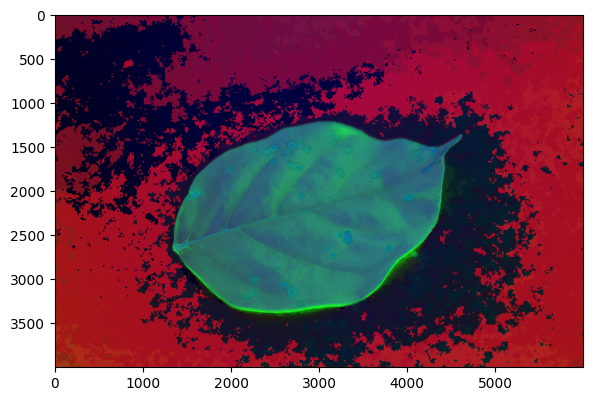

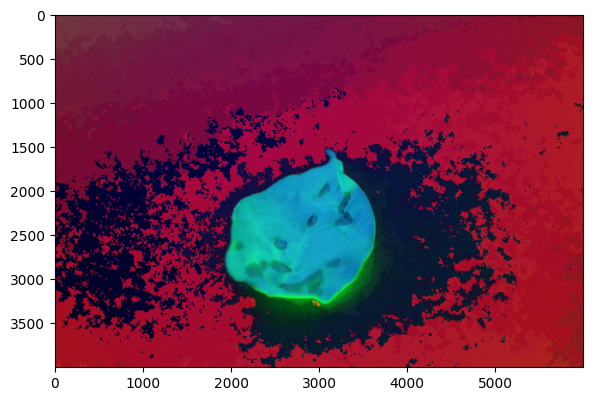

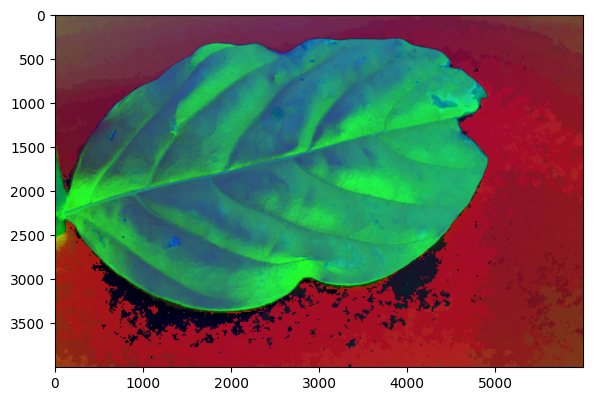

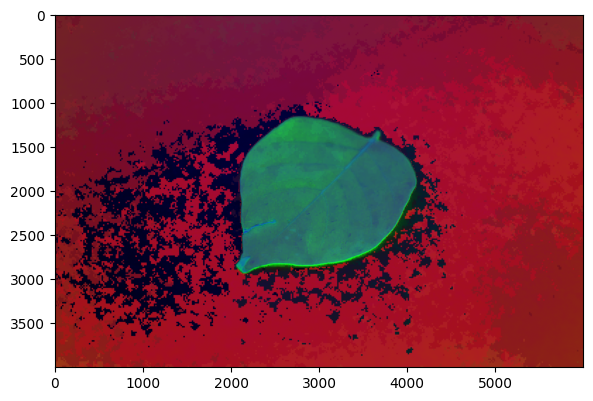

In [8]:
for j in range(4):
    plt.figure(figsize=(15,20))
    plt.subplot(2,2,j+1)
    plt.imshow(hsv_images[j])

In [5]:
#define range of green color in HSV
lower_green = np.array([25,52,72])
upper_green = np.array([102,255,255])

In [6]:
green_mask=[]
for i in range(len(hsv_images)):
    mask = cv2.inRange(hsv_images[i], lower_green, upper_green)
    res = cv2.bitwise_and(rgb_images[i],rgb_images[i], mask= mask)
    green_mask.append(res)


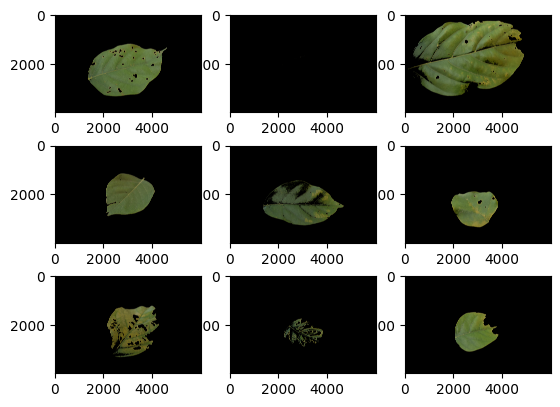

In [7]:
for j in range(9):
    plt.figsize=(15,20)
    plt.subplot(3,3,j+1)
    plt.imshow(green_mask[j])

In [9]:
#define range of brown color in HSV
lower_brown = np.array([10,0,10])
upper_brown = np.array([20,255,200])

In [10]:
final_masked_images=[]
for i in range(len(hsv_images)):
    mask = cv2.inRange(hsv_images[i], lower_brown, upper_brown)
    res = cv2.bitwise_and(rgb_images[i],rgb_images[i], mask= mask)
    final_masked_images.append(res)

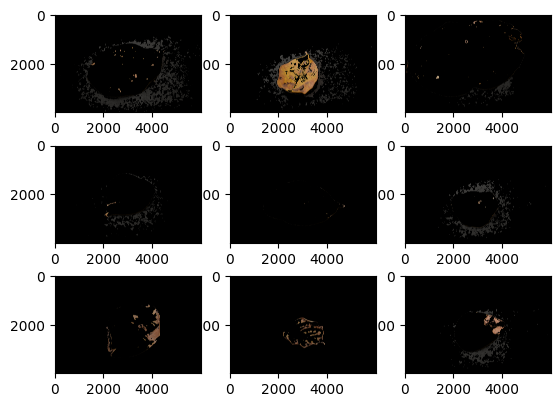

In [11]:
for j in range(9):
    plt.figzise=(15,20)
    plt.subplot(3,3,j+1)
    plt.imshow(final_masked_images[j])

In [12]:
final_mask=[]
for i in range(len(hsv_images)):
    final_mask.append(green_mask[i]+final_masked_images[i])


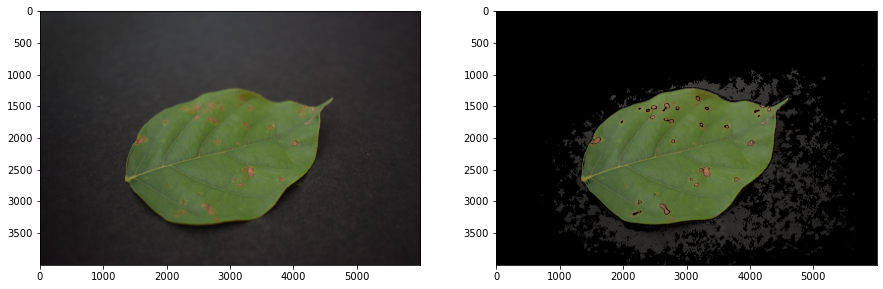

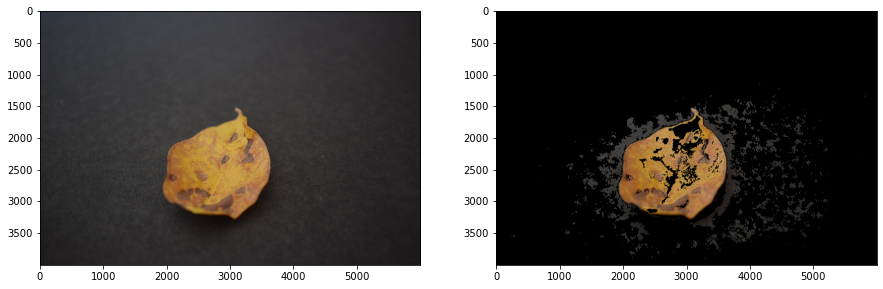

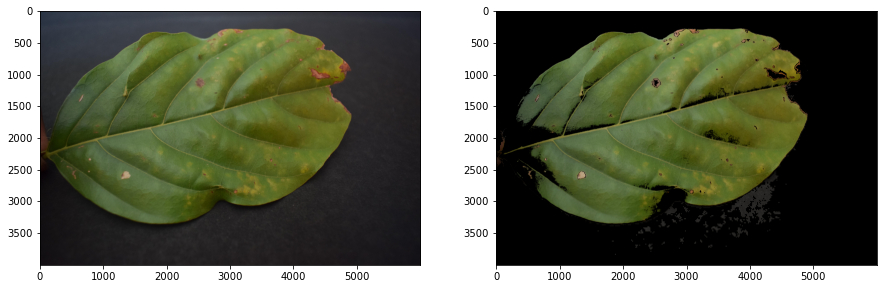

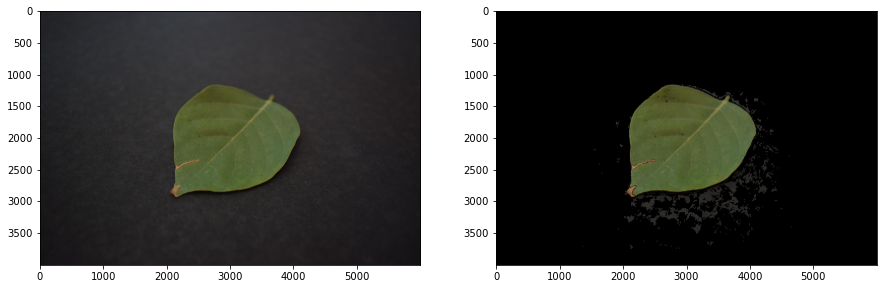

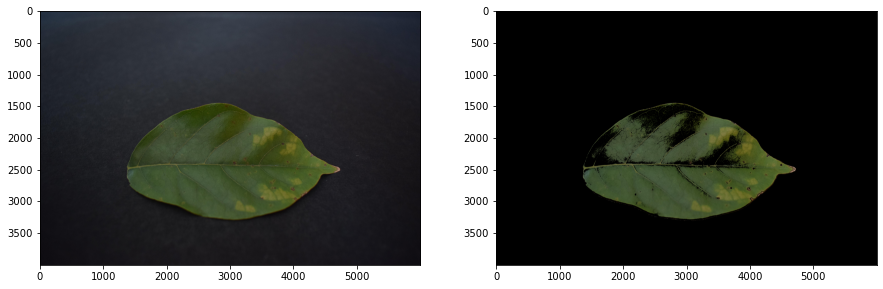

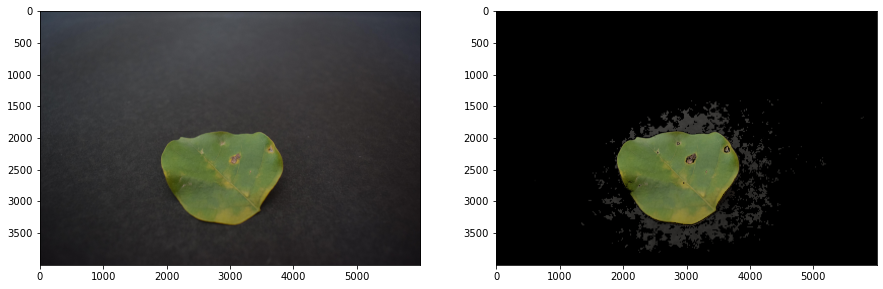

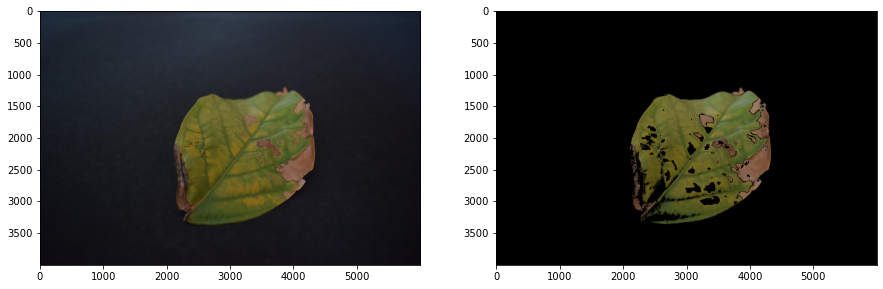

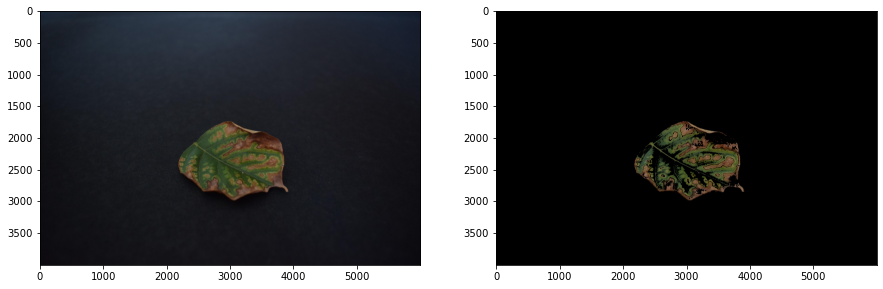

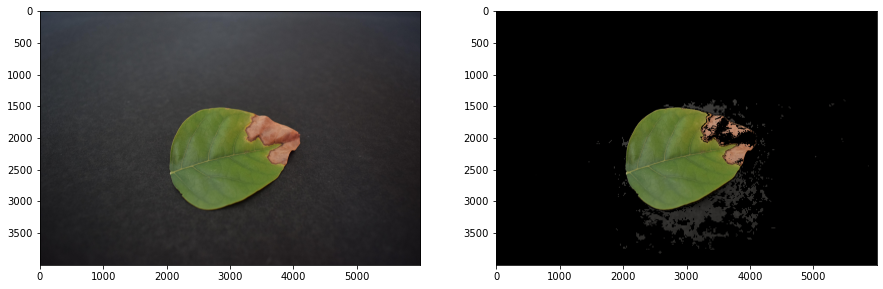

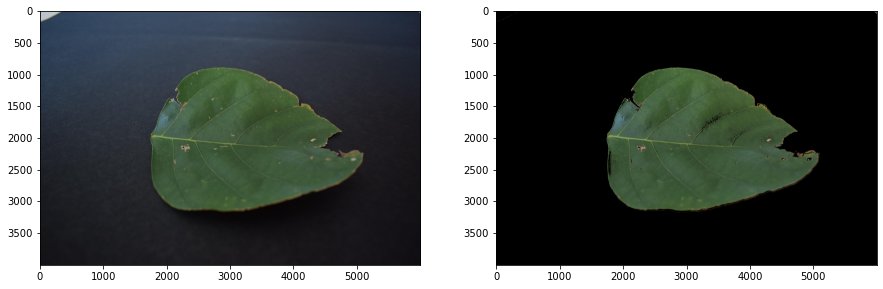

In [10]:
#show each image and its segmented image
for i in range(10):
    plt.figure(figsize=(15,20))
    plt.subplot(1,2,1)
    plt.imshow(rgb_images[i])
    plt.subplot(1,2,2)
    plt.imshow(final_mask[i])

In [13]:
cv_im=cv2.imread(files[0])
pixel_colors = cv_im.reshape((np.shape(cv_im)[0]*np.shape(cv_im)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from PIL import Image

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

im = Image.open(files[0])

r, g, b = list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2))

axis.scatter(r, g, b, c=pixel_colors, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from PIL import Image

h, s, v = cv2.split(hsv_images[0])
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), c=pixel_colors, marker="o")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()
